# Análisis exploratorio de los datos

In [2]:
# Cargar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

%matplotlib inline

In [3]:
# Cargar datos
df = pd.read_csv('data/codornices.csv')
print(df.isnull().sum().any())
df.tail()

False


,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap,year
183,2015-59,A,female,NM,0.3501,0.0,0.0,0.3501,0.0000,0.0000,...,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.112925,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...,2015
184,2015-6,J,female,NM,0.1977,0.0,0.0,0.0000,0.0000,0.0000,...,127.25,324.0,11.175000,2023.0,33.688852,-107.330940,0.000000,1.796301,North American Warm Desert Bedrock Cliff and O...,2015
185,2015-60,J,female,NM,2.6084,0.0,0.0,2.5800,0.0000,0.0000,...,86.99,315.0,14.458333,1543.0,32.590956,-107.920563,0.065394,1.628812,Apacherian-Chihuahuan Piedmont Semi-Desert Gra...,2015
186,2015-61,A,male,NM,7.3265,0.0,0.0,0.0000,7.3265,0.0000,...,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.000000,0.761439,Madrean Pinyon-Juniper Woodland,2015
187,2015-63,J,female,NM,5.9750,0.0,0.0,0.0000,5.8287,0.1445,...,763.38,332.0,14.225000,1560.0,32.592245,-107.930243,0.116640,0.761439,Madrean Pinyon-Juniper Woodland,2015


## **Sección Joseca:** Análisis de relación entre variables dependientes y variables categóricas Edad, Sexo y Estado

In [4]:
# Lista con el nombre de las variables dependientes
DEPENDENT_VARS = df.columns[5:-12]

## Edad

#### ¿Qué categoría de edad está más presente en los datos?

In [5]:
# Crear un DataFrame con el conteo de valores de edad
conteo_edad = df['edad'].value_counts().reset_index()
conteo_edad.columns = ['Edad', 'Conteo']

# Crear gráfica de barras
fig = px.bar(conteo_edad, x='Edad', y='Conteo', title='Conteo de Edades',
             labels={'Edad': 'Edad', 'Conteo': 'Cantidad'}, color='Edad',
             color_discrete_map={'J': 'deepskyblue', 'A': 'blue'})

# Desplegar figura
fig.show()


Se cuenta con 131 individuos en su etapa juvenil y 52 en su etapa adulta. Esto equivale a un 72 y 28% respectivamente.

#### ¿Existe una relación entre el peso total del buche y la edad de los sujetos?

In [6]:
# Hhistogramas y boxplots del peso total por edad
fig = px.histogram(df, x='peso total', color='edad', color_discrete_map={'J': 'deepskyblue', 'A': 'blue'}, marginal='box',
                   title='Distribuciones de Peso Total por Edad',
                   labels={'peso total': 'Peso Total', 'edad': 'Edad', 'ylabel': 'conteo'},
                   barmode='overlay', opacity=0.75)

# Cambiar el nombre del eje y solo en el histograma
fig.update_yaxes(title_text='Conteo', row=1, col=1)

# Desplegar gráfica
fig.show()


Se observa un amplio solapamiento en las distribuciones y boxplots de ambas edades. Esto sugiere que no existe diferencia significativa en los pesos del buche de los individuos en sus distintas etapas. 

#### ¿Existe una relación entre la edad y el patrón de consumo de las distintas opciones de alimento?

In [7]:
# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp = pd.melt(df, id_vars=['edad'], value_vars=DEPENDENT_VARS, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp, x='Alimento', y='Peso', color='edad', color_discrete_map={'J': 'deepskyblue', 'A': 'blue'},
                 facet_col='edad', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'edad': 'Edad'},
                 title='Gráfico de dispersión para cada Alimento por Edad')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()


De la gran diversidad de opciones de alimento, notamos que solo unas pocas fueron consumidas. Procedemos a identificar los alimentos más consumidos y evaluevaluamos si existe una diferencia clara en su consumo entre las distintas edades.  

In [8]:
# Lista de los 10 alimentos más consumidos (independientemente de la edad)
top10 = list(df_temp.groupby(['Alimento'])['Peso'].sum().sort_values(ascending=False).reset_index()[:10]['Alimento'])

# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp_top_10 = pd.melt(df, id_vars=['edad'], value_vars=top10, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp_top_10, x='Alimento', y='Peso', color='edad', color_discrete_map={'J': 'deepskyblue', 'A': 'blue'},
                 facet_col='edad', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'edad': 'Edad'},
                 title='Gráfico de dispersión de los 10 alimentos más consumidos por Edad')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()

## Sexo

#### ¿Qué sexo está más presente en los datos?

In [9]:
# Crear un DataFrame con el conteo de valores de edad
conteo_sexo = df['sexo'].value_counts().reset_index()
conteo_sexo.columns = ['Sexo', 'Conteo']

# Crear gráfica de barras
fig = px.bar(conteo_sexo, x='Sexo', y='Conteo', title='Conteo de Sexo',
             labels={'Sexo': 'Sexo', 'Conteo': 'Cantidad'}, color='Sexo',
             color_discrete_map={'female': 'lightcoral', 'male': 'lightblue'})

# Desplegar figura
fig.show()


Se cuenta con 115 individuos macho y 68 hembra. Esto equivale a un 63 y 37% respectivamente.

#### ¿Existe una relación entre el peso total del buche y el sexo de los sujetos?

In [10]:
# Hhistogramas y boxplots del peso total por edad
fig = px.histogram(df, x='peso total', color='sexo', color_discrete_map={'female': 'lightcoral', 'male': 'lightblue'}, marginal='box',
                   title='Distribuciones de Peso Total por Sexo',
                   labels={'peso total': 'Peso Total', 'sexo': 'Sexo', 'ylabel': 'conteo'},
                   barmode='overlay', opacity=0.75)

# Cambiar el nombre del eje y solo en el histograma
fig.update_yaxes(title_text='Conteo', row=1, col=1)

# Desplegar gráfica
fig.show()


Se observa un amplio solapamiento en las distribuciones y boxplots de ambos sexos. Esto sugiere que no existe diferencia significativa en los pesos del buche de los individuos de distinto sexo. 

#### ¿Existe una relación entre el sexo y el patrón de consumo de las distintas opciones de alimento?

In [11]:
# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp = pd.melt(df, id_vars=['sexo'], value_vars=DEPENDENT_VARS, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp, x='Alimento', y='Peso', color='sexo', color_discrete_map={'female': 'lightcoral', 'male': 'lightblue'},
                 facet_col='sexo', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'sexo': 'Sexo'},
                 title='Gráfico de dispersión para cada Alimento por Sexo')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()


De la gran diversidad de opciones de alimento, notamos que solo unas pocas fueron consumidas. Procedemos a identificar los alimentos más consumidos y evaluaremos si existe una diferencia clara en su consumo entre los distintos sexos.  

In [12]:
# Lista de los 10 alimentos más consumidos (independientemente de la edad)
top10 = list(df_temp.groupby(['Alimento'])['Peso'].sum().sort_values(ascending=False).reset_index()[:10]['Alimento'])

# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp_top_10 = pd.melt(df, id_vars=['sexo'], value_vars=top10, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp_top_10, x='Alimento', y='Peso', color='sexo', color_discrete_map={'female': 'lightcoral', 'male': 'lightblue'},
                 facet_col='sexo', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'sexo': 'Sexo'},
                 title='Gráfico de dispersión de los 10 alimentos más consumidos por Sexo')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()

## Estado

#### ¿Qué estado está más presente en los datos?

In [13]:
# Crear un DataFrame con el conteo de valores de edad
conteo_sexo = df['estado'].value_counts().reset_index()
conteo_sexo.columns = ['Estado', 'Conteo']

# Crear gráfica de barras
fig = px.bar(conteo_sexo, x='Estado', y='Conteo', title='Conteo de Estado',
             labels={'Estado': 'Estado', 'Conteo': 'Cantidad'}, color='Estado',
             color_discrete_map={'NM': 'darkorange', 'AZ': 'darkred'})

# Desplegar figura
fig.show()


Se cuenta con 132 individuos colectados en Nuevo México y 51 en Arizona. Esto equivale a un 72 y 28% respectivamente.

#### ¿Existe una relación entre el peso total del buche y el estado en el fueron colectados los sujetos?

In [14]:
# Hhistogramas y boxplots del peso total por edad
fig = px.histogram(df, x='peso total', color='estado', color_discrete_map={'NM': 'darkorange', 'AZ': 'darkred'}, marginal='box',
                   title='Distribuciones de Peso Total por Estado',
                   labels={'peso total': 'Peso Total', 'estado': 'Estado', 'ylabel': 'conteo'},
                   barmode='overlay', opacity=0.75)

# Cambiar el nombre del eje y solo en el histograma
fig.update_yaxes(title_text='Conteo', row=1, col=1)

# Desplegar gráfica
fig.show()


Se observa un amplio solapamiento en las distribuciones y boxplots de ambos estados. Esto sugiere que no existe diferencia significativa en los pesos del buche de los individuos provenientes de distinto estado. 

#### ¿Existe una relación entre el estado de colecta y el patrón de consumo de las distintas opciones de alimento?

In [15]:
# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp = pd.melt(df, id_vars=['estado'], value_vars=DEPENDENT_VARS, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp, x='Alimento', y='Peso', color='estado', color_discrete_map={'NM': 'darkorange', 'AZ': 'darkred'},
                 facet_col='estado', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'estado': 'Estado'},
                 title='Gráfico de dispersión para cada Alimento por Estado')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()


De la gran diversidad de opciones de alimento, notamos que solo unas pocas fueron consumidas. Procedemos a identificar los alimentos más consumidos y evaluaremos si existe una diferencia clara en su consumo entre los distintos estados en los que fueron colectados los individuos.  

In [16]:
# Lista de los 10 alimentos más consumidos (independientemente de la edad)
top10 = list(df_temp.groupby(['Alimento'])['Peso'].sum().sort_values(ascending=False).reset_index()[:10]['Alimento'])

# Crear dataframe temporal con las variables a graficar en la columna "Alimento" y sus respectivos Pesos y Edad en otras columnas
df_temp_top_10 = pd.melt(df, id_vars=['estado'], value_vars=top10, var_name='Alimento', value_name='Peso')

# Crear sub-gráficos de dispersión para cada alimento y edad
fig = px.scatter(df_temp_top_10, x='Alimento', y='Peso', color='estado', color_discrete_map={'NM': 'darkorange', 'AZ': 'darkred'},
                 facet_col='estado', facet_col_wrap=1,  # Cambia el valor de facet_col_wrap según el número deseado de columnas
                 labels={'Alimento': 'Alimento', 'Peso': 'Gramos', 'estado': 'Estado'},
                 title='Gráfico de dispersión de los 10 alimentos más consumidos por Estado')

# Eliminar subtitulos redundantes
fig.for_each_annotation(lambda a: a.update(text=''))

# Lineas en lugar de puntos
#fig.update_traces(mode='lines+markers')

# Desplegar figura
fig.show()

In [17]:
df.columns

Index(['id', 'edad', 'sexo', 'estado', 'peso total', 'Oxalis', 'Quercus',
       'Cyp.bulb', 'Phaseolus', 'Tephoria',
       ...
       'dist camino', 'ppanual17', 'tmedia17', 'altitud', 'lat', 'lon',
       'hcrop', 'hland', 'gap', 'year'],
      dtype='object', length=147)

In [18]:
# Grafica scatter de 5 dimensiones, usando color, tamaño y forma
fig = px.scatter(df, x='peso total', y='altitud', size='covey', size_max=12, opacity=0.7,
                 color='covey',
                 color_continuous_scale='viridis',  # Agrega la paleta de colores 'viridis'
                 title='Distribución del Peso Total, Altitud y Tamaño de covey',)

fig.show()

In [19]:
# Ordenar el DataFrame por la columna 'time'
df_sorted = df.sort_values(by='time')

# Crear el gráfico de dispersión con el DataFrame ordenado
fig = px.scatter(df_sorted, x='time', y='peso total', color='covey', color_continuous_scale='viridis', title='Peso total contra las horas ordenadas de menor a mayor')

# Mostrar el gráfico
fig.show()

## Seccion Gaytan: Visualizaciones geograficas

**¿De dónde se obtuvieron los especímenes?**

In [20]:
import geopandas as gpd

In [21]:
# Convirtiendo nuestro df en geodf

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326"
)

In [22]:
gdf.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap,year,geometry
0,2014-104,J,female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014,POINT (-108.96378 34.03797)
1,2014-105,J,male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland,2014,POINT (-108.96378 34.03797)
2,2016-133,A,female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal,2016,POINT (-110.53049 31.37572)
3,2014-28,J,female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland,2014,POINT (-107.73559 33.17679)
4,2016-132,J,male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub,2016,POINT (-110.53106 31.35305)


In [23]:
# Visualizacion inicial de los datos en un mapa

px.set_mapbox_access_token(open(".mapbox_access").read())

fig = px.scatter_mapbox(
    gdf,
    lat = gdf.geometry.y,
    lon = gdf.geometry.x,
    zoom=5.5,
    title="Distribución geográfica de los especímenes estudiados",
    hover_name = "id",
    opacity = 0.3
)

lat_foc = 32.821669
lon_foc = -106.076732
fig.update_layout(
    geo = dict(
            center=dict(lat=lat_foc, lon=lon_foc), # this will center on the point
    )
)

fig.update_traces(
    cluster = dict(enabled=False),
    marker = dict(
        size = 10
    )
)

fig.write_image('img/dist.png')
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_access'

Para apreciar mejor al distribución geográfica, separamos nuestro dataset en dos

In [24]:
gdf_AZ = gdf[gdf['estado'] == 'AZ']
gdf_NM = gdf[gdf['estado'] == 'NM']

In [25]:
fig = px.density_mapbox(
    gdf_AZ,
    lat = gdf_AZ.geometry.y,
    lon = gdf_AZ.geometry.x,
    zoom=9,
    radius = 10,
    title="Distribución geográfica de los especímenes (AZ)",
    hover_name = "id",
    mapbox_style='satellite-streets'
)

fig.update(
    layout_coloraxis_showscale=False
)

fig.update_layout(
    height=900,
    width=900
)

fig.update_layout(
    geo = dict(
            center=dict(lat=31.540038, lon=-110.756092), # this will center on the point
    )
)

fig.write_image('img/dist_AZ.png')
fig.show()

ValueError: Transform failed with error code 525: Missing Mapbox access token.
Mapbox trace type require a Mapbox access token to be registered.
For example:
  Plotly.newPlot(gd, data, layout, { mapboxAccessToken: 'my-access-token' });
More info here: https://www.mapbox.com/help/define-access-token/

In [ ]:
fig = px.density_mapbox(
    gdf_NM,
    lat = gdf_NM.geometry.y,
    lon = gdf_NM.geometry.x,
    zoom=7,
    radius = 10,
    title="Distribución geográfica de los especímenes (NM)",
    hover_name = "id",
    mapbox_style='satellite-streets'
)

fig.update(
    layout_coloraxis_showscale=False
)

fig.update_layout(
    height=900,
    width=900
)

fig.update_layout(
    geo = dict(
            center=dict(lat=32.894312, lon=-107.903209), # this will center on the point
    )
)

fig.write_image('img/dist_NM.png')
fig.show()

# Análisis de la Dieta.

¿Cuales son los alimentos más frecuentemente encontrados en la dieta?

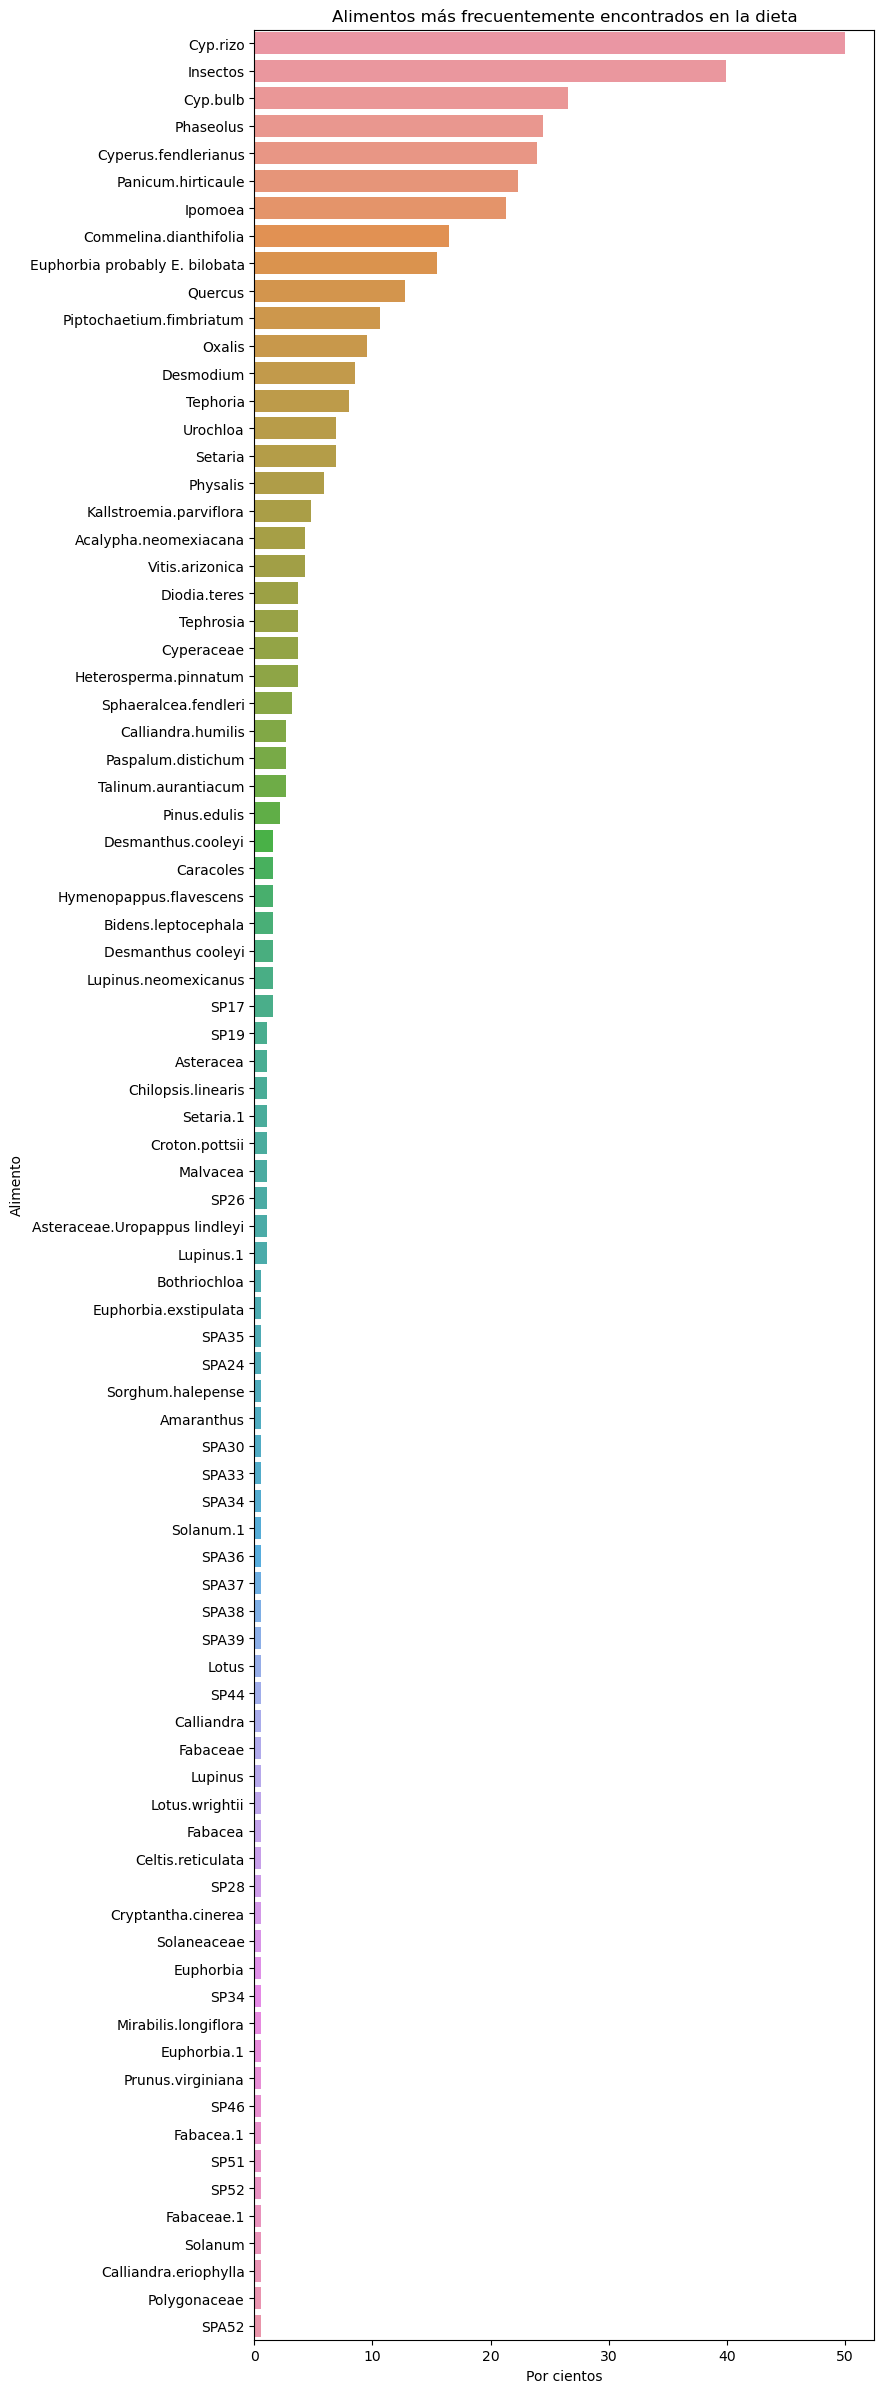

In [26]:
# Separando columnas de alimentos de las demás...
non_food_columns = ["id", "edad", "sexo", "estado", "peso total", "time", "covey",
                    "dist camino", "ppanual17", "tmedia17", "altitud", "lat", "lon",
                    "hcrop", "hland", "gap", "year"]

food_columns = [columna for columna in df.columns if columna not in non_food_columns]

# Dicotomizar los valores de las columnas de alimentos a valores cualitativos (True / False)...
df_cualit = df.copy()
df_cualit[food_columns] = df_cualit[food_columns].applymap(lambda x: True if x > 0 else False)

# Eliminar columnas de alimentos que no se consumieron...
food_columns_list = pd.DataFrame(df_cualit[food_columns].sum() != 0).reset_index()
food_columns_list.columns = ["Alimento", "Cantidad"]
food_columns_false = list(food_columns_list.loc[food_columns_list["Cantidad"] == False, "Alimento"])

df_cualit = df_cualit.drop(columns=food_columns_false)

# crear lista de comidas nuevamente... pero a parir del df_cualit...
food_columns = [columna for columna in df_cualit.columns if columna not in non_food_columns]

# foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum()).reset_index(drop = False)
foods_df_cualit = pd.DataFrame(df_cualit[food_columns].sum() / len(df_cualit) * 100).reset_index(drop=False)

foods_df_cualit.columns = ["Alimento", "Cantidad"]
foods_df_cualit.sort_values(by="Cantidad", ascending=False, inplace=True)
foods_df_cualit

# Graficando las Comidas más frecuentes...
plt.figure(figsize=(8, 30))
sns.barplot(x = "Cantidad", y = "Alimento", data = foods_df_cualit,)
plt.title("Alimentos más frecuentemente encontrados en la dieta")
plt.xlabel("Por cientos")
plt.show()

In [27]:
df_cualit[food_columns].sum(axis=1).describe()

count    188.000000
mean       3.925532
std        2.561498
min        0.000000
25%        2.000000
50%        3.000000
75%        5.250000
max       15.000000
dtype: float64

¿Cuál es el número pronmedio de alimentos encontrados en un buche?

In [28]:
promedio_total = int(np.mean(df_cualit[food_columns].sum(axis=1)).round(0))
print(f"Promedio total de alimentos por individuo: {promedio_total}. Con una variedad máxima de 15 alimentos.")

Promedio total de alimentos por individuo: 4. Con una variedad máxima de 15 alimentos.


¿Existe relación con el índice de variedad de la vegetación? Suena lógico... pero hay que verlo...

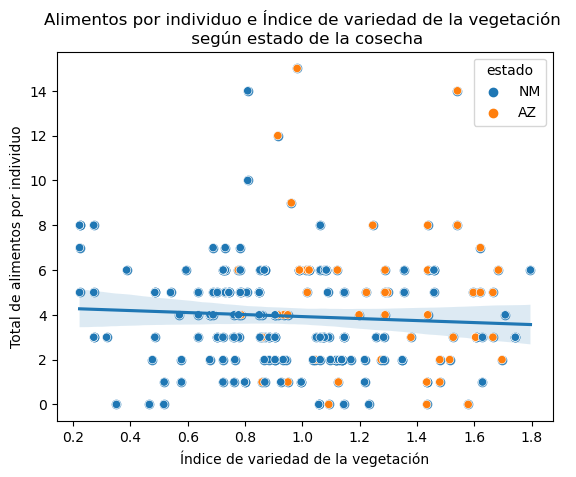

In [29]:
df_cualit["total_alimentos"] = df_cualit[food_columns].sum(axis=1)

sns.regplot(x="hland", y="total_alimentos", data=df_cualit)
sns.scatterplot(x = "hland", y = "total_alimentos", data = df_cualit, hue = "estado")
plt.title("Alimentos por individuo e Índice de variedad de la vegetación \n según estado de la cosecha")
plt.xlabel("Índice de variedad de la vegetación")
plt.ylabel("Total de alimentos por individuo")
plt.show()

# Pareciera que no???

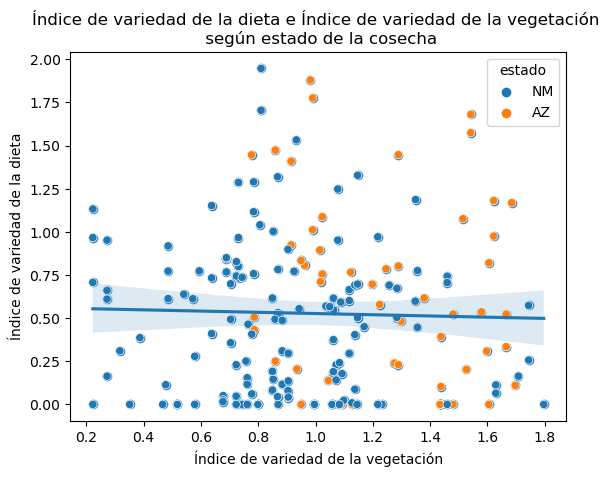

In [30]:
# Gráfico de dispersión del índice de variedad de la vegetación y el índice de variedad de la dieta...
sns.regplot(x="hland", y="hcrop", data=df_cualit)
sns.scatterplot(x = "hland", y = "hcrop", data = df_cualit, hue = "estado")
plt.title("Índice de variedad de la dieta e Índice de variedad de la vegetación \n según estado de la cosecha")
plt.xlabel("Índice de variedad de la vegetación")
plt.ylabel("Índice de variedad de la dieta")
plt.show()

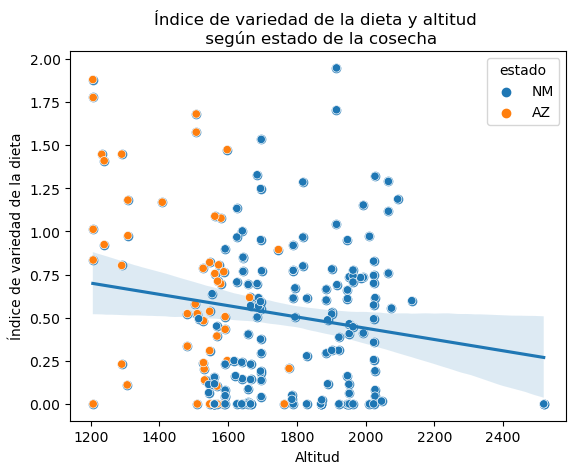

In [37]:
# Gráfico de dispersión del índice de variedad de la dieta y altitud...
sns.regplot(x="altitud", y="hcrop", data=df_cualit)
sns.scatterplot(x = "altitud", y = "hcrop", data = df_cualit, hue = "estado")
plt.title("Índice de variedad de la dieta y altitud \n según estado de la cosecha")
plt.xlabel("Altitud")
plt.ylabel("Índice de variedad de la dieta")
plt.show()

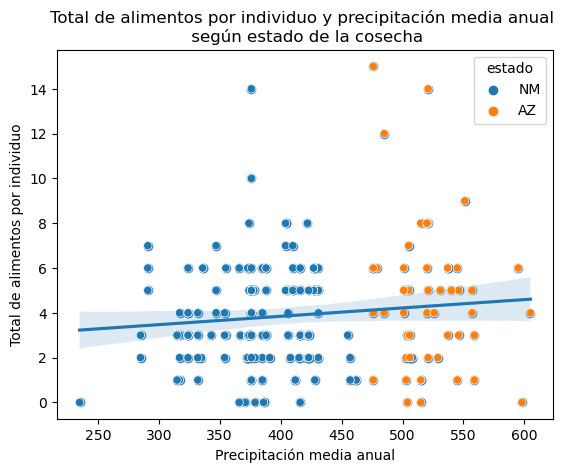

In [31]:
# Relacion entre la cantidad de alimentos diferentes encontrados en el buche y la precipitacion media anual
sns.regplot(x="ppanual17", y="total_alimentos", data=df_cualit)
sns.scatterplot(x = "ppanual17", y = "total_alimentos", data = df_cualit, hue = "estado")
plt.title("Total de alimentos por individuo y precipitación media anual \n según estado de la cosecha")
plt.xlabel("Precipitación media anual")
plt.ylabel("Total de alimentos por individuo")
plt.show()

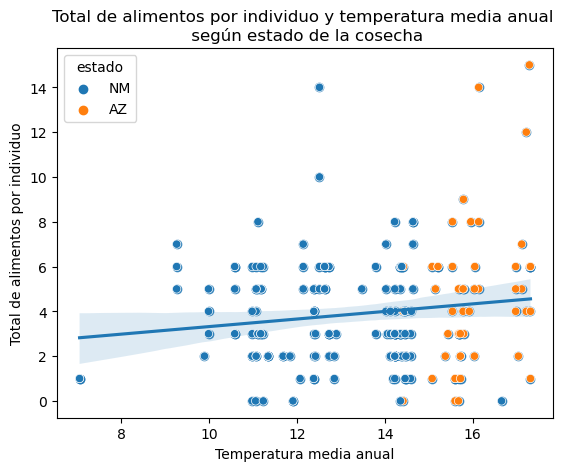

In [32]:
# Relacion entre la cantidad de alimentos diferentes encontrados en el buche y la temperatur media anual
sns.regplot(x="tmedia17", y="total_alimentos", data=df_cualit)
sns.scatterplot(x = "tmedia17", y = "total_alimentos", data = df_cualit, hue = "estado")
plt.title("Total de alimentos por individuo y temperatura media anual \n según estado de la cosecha")
plt.xlabel("Temperatura media anual")
plt.ylabel("Total de alimentos por individuo")
plt.show()

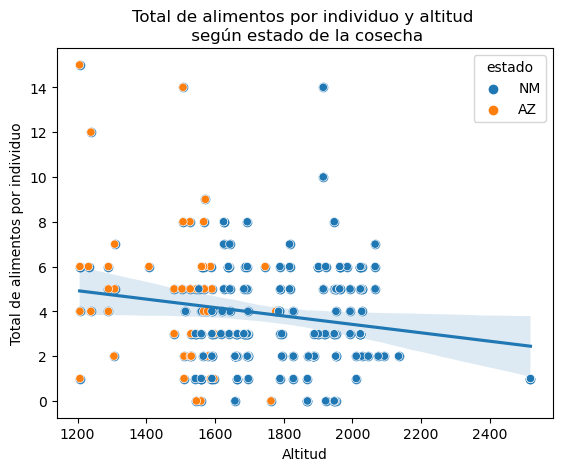

In [35]:
# Relacion entre la cantidad de alimentos diferentes encontrados en el buche y la altitud...
sns.regplot(x="altitud", y="total_alimentos", data=df_cualit)
sns.scatterplot(x = "altitud", y = "total_alimentos", data = df_cualit, hue = "estado")
plt.title("Total de alimentos por individuo y altitud \n según estado de la cosecha")
plt.xlabel("Altitud")
plt.ylabel("Total de alimentos por individuo")
plt.show()